# Importing Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn 

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Helper functions 

In [17]:
def unique(dataset):
    for i in dataset:
        unique = dataset[i].unique()
        print(f'{i}: {unique}, Length: {len(unique)}')

# Data 

In [3]:
data = pd.read_csv('train.csv')

In [4]:
data.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1


In [5]:
data.shape

(159256, 24)

In [6]:
data.describe()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,...,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000
mean,79627.500000,44.306626,165.266929,67.143662,83.001990,1.005798,1.000989,1.023974,1.023421,122.503648,...,55.852684,114.607682,14.796965,1.074233,0.892764,25.516853,26.550296,36.216004,0.197996,0.437365
std,45973.391572,11.842286,8.818970,12.586198,8.957937,0.402113,0.392299,0.152969,0.151238,12.729315,...,13.964141,28.158931,1.431213,0.347856,0.179346,9.464882,17.753070,31.204643,0.398490,0.496063
min,0.000000,20.000000,135.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,77.000000,...,9.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
25%,39813.750000,40.000000,160.000000,60.000000,77.000000,0.800000,0.800000,1.000000,1.000000,114.000000,...,45.000000,95.000000,13.800000,1.000000,0.800000,20.000000,16.000000,18.000000,0.000000,0.000000
50%,79627.500000,40.000000,165.000000,65.000000,83.000000,1.000000,1.000000,1.000000,1.000000,121.000000,...,54.000000,114.000000,15.000000,1.000000,0.900000,24.000000,22.000000,27.000000,0.000000,0.000000
75%,119441.250000,55.000000,170.000000,75.000000,89.000000,1.200000,1.200000,1.000000,1.000000,130.000000,...,64.000000,133.000000,15.800000,1.000000,1.000000,29.000000,32.000000,44.000000,0.000000,1.000000
max,159255.000000,85.000000,190.000000,130.000000,127.000000,9.900000,9.900000,2.000000,2.000000,213.000000,...,136.000000,1860.000000,21.000000,6.000000,9.900000,778.000000,2914.000000,999.000000,1.000000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159256 non-null  int64  
 1   age                  159256 non-null  int64  
 2   height(cm)           159256 non-null  int64  
 3   weight(kg)           159256 non-null  int64  
 4   waist(cm)            159256 non-null  float64
 5   eyesight(left)       159256 non-null  float64
 6   eyesight(right)      159256 non-null  float64
 7   hearing(left)        159256 non-null  int64  
 8   hearing(right)       159256 non-null  int64  
 9   systolic             159256 non-null  int64  
 10  relaxation           159256 non-null  int64  
 11  fasting blood sugar  159256 non-null  int64  
 12  Cholesterol          159256 non-null  int64  
 13  triglyceride         159256 non-null  int64  
 14  HDL                  159256 non-null  int64  
 15  LDL              

In [8]:
data.isnull().sum()

id                     0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64

In [18]:
unique(data)

id: [     0      1      2 ... 159253 159254 159255], Length: 159256
age: [55 70 20 35 30 50 45 40 60 25 65 75 80 85 62 69 49 58], Length: 18
height(cm): [165 170 180 160 155 175 150 181 145 185 140 190 135 139], Length: 14
weight(kg): [ 60  65  75  95  55  70  50  45  90  80  85 110  40 100 130 105  30 120
 115 125  35 101  89  82  83  99  79  88], Length: 28
waist(cm): [ 81.   89.  105.   80.5  51.   69.   84.5  73.   68.   64.   80.  103.
  81.8  78.   92.   71.5  90.   93.   85.   86.4  84.   66.   75.   87.5
  91.5  76.   87.   71.   86.   83.   87.2  94.   91.   70.   88.   72.
  93.1  70.4  79.   77.   82.   87.8  97.   85.5  67.   87.3 114.   95.2
  67.2  99.   65.   90.5  74.   73.5  95.   75.8  77.2  98.   91.1  62.
  90.2 101.   89.6  83.4  68.5  72.5  85.7  87.1  59.   89.5 108.5  90.1
  91.8  86.2  72.8  73.2  89.8  86.3 100.   81.5  97.5  76.2  94.5  79.4
  98.5  78.4  90.8  88.4  98.4  94.2  79.7  83.5  93.6  89.9  93.2  89.2
  71.2  92.8  88.2  65.6 101.8  97.8  72.4  75

# Exploratory Data Analysis 

1. Univariate
2. Bi-variate
3. Mutli-variate

## Univariate 

In [19]:
data.columns

Index(['id', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries', 'smoking'],
      dtype='object')

In [36]:
sns.scatterplot??

<Axes: xlabel='age', ylabel='Count'>

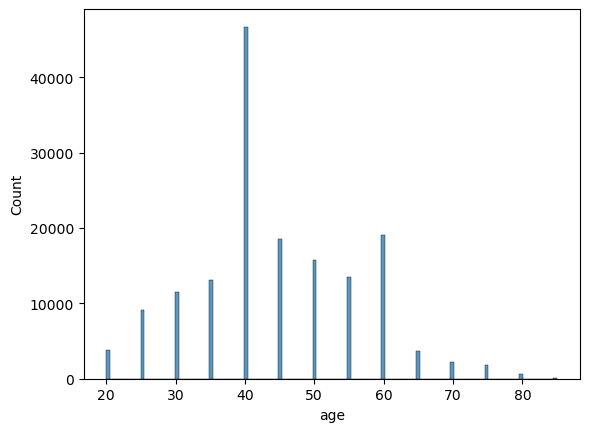

In [30]:
sns.histplot(data=data, x='age')

<Axes: xlabel='waist(cm)', ylabel='Count'>

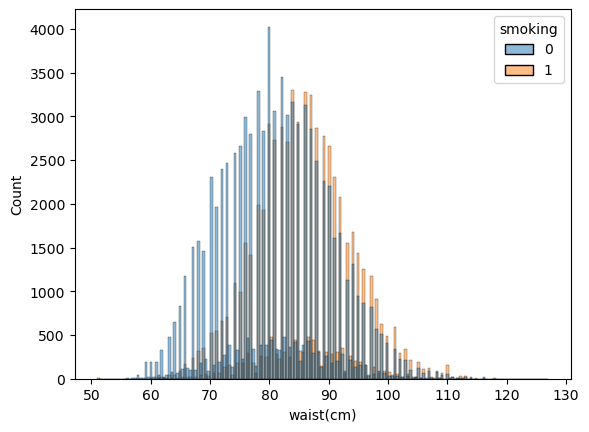

In [28]:
sns.histplot(data=data, x='waist(cm)', hue='smoking')

<Axes: xlabel='height(cm)', ylabel='weight(kg)'>

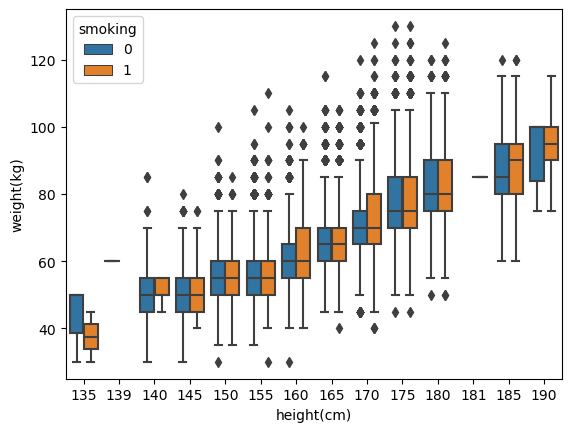

In [34]:
sns.boxplot(data=data, x='height(cm)', y='weight(kg)', hue='smoking')

<Axes: xlabel='age', ylabel='count'>

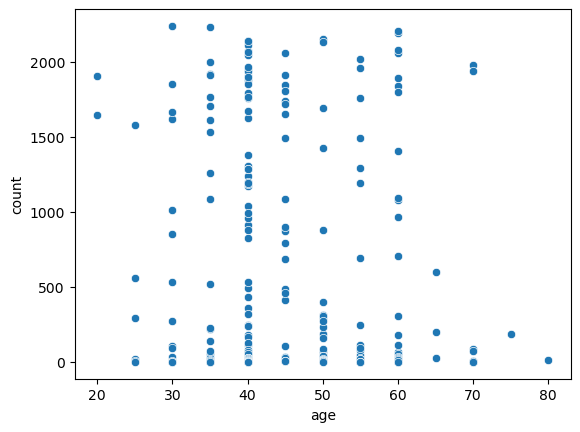

In [40]:
count = data['Cholesterol'].value_counts()
sns.scatterplot(data=data, x='age', y=count)